In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
import iminuit
from iminuit import Minuit
from uncertainties import ufloat
import cmasher as cmr
from scipy.constants import h, k, e

e = e*1e19
h = h*1e34
k = k*1e23

import ROOT

plt.style.use(hep.style.ATLAS)

Welcome to JupyROOT 6.24/02


In [2]:
# Data from our analysis
# the data is given in SI units adapted
# Millikan EXP.
μ_e, σ_e = 1.608, 0.020 # *10^-19 C
# h/k best fit
μ_hk, σ_hk = 3.27, 0.04 # *10^-11 K s


## Various sets for data fitting
# e/k 
μ_ek, σ_ek = 1.1440, 0.0040 # *10^4 C K/J

# e/h
μ_eh1, σ_eh1 = 0.201, 0.006 # *10^15 C/(Js)
μ_eh2, σ_eh2 = 0.252, 0.010 # *10^15 C/(Js)


## test con set 2 per eh
def χ2(e, h, k):
    fcn = 0.
    fcn += ((μ_e - e) / σ_e)**2     ## e -> Mlk
    fcn += ((μ_hk - h/k) / σ_hk)**2 ## e/h
    fcn += ((μ_ek - e/k) / σ_ek)**2 ## e/k
    fcn += ((μ_eh2 - e/h) / σ_eh2)**2 ## h/k (set 1)
    return fcn

m_ehk = Minuit(χ2, e=1.6, k=1.38, h=5)
m_ehk.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 80.94                      │              Nfcn = 63               │
│ EDM = 6.04e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ e    │   1.608   │   0.020   │            │            │         │         │       │
│ 1 │ h    │   4.80    │   0.08    │            │            │         │         │       │
│ 2 │ k    │   1.410   │   0.018   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬────────────────────────────┐
│   │        e        h        k │
├───┼────────────────────────────┤
│ e │   0.0004  0.00119 0.000351 │
│ h │  0.00119  0.00634  0.00112 │
│ k │ 0.000351  0.00112 0.000332 │
└───┴────────────────────────────┘

In [3]:
m_ehk.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 80.94                      │              Nfcn = 79               │
│ EDM = 6.04e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ e    │   1.608   │   0.020   │            │            │         │         │       │
│ 1 │ h    │   4.80    │   0.08    │            │            │         │         │       │
│ 2 │ k    │   1.410   │   0.018   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬────────────────────────────┐
│   │        e        h        k │
├───┼────────────────────────────┤
│ e │   0.0004  0.00119 0.000351 │
│ h │  0.00119  0.00634  0.00112 │
│ k │ 0.000351  0.00112 0.000332 │
└───┴────────────────────────────┘

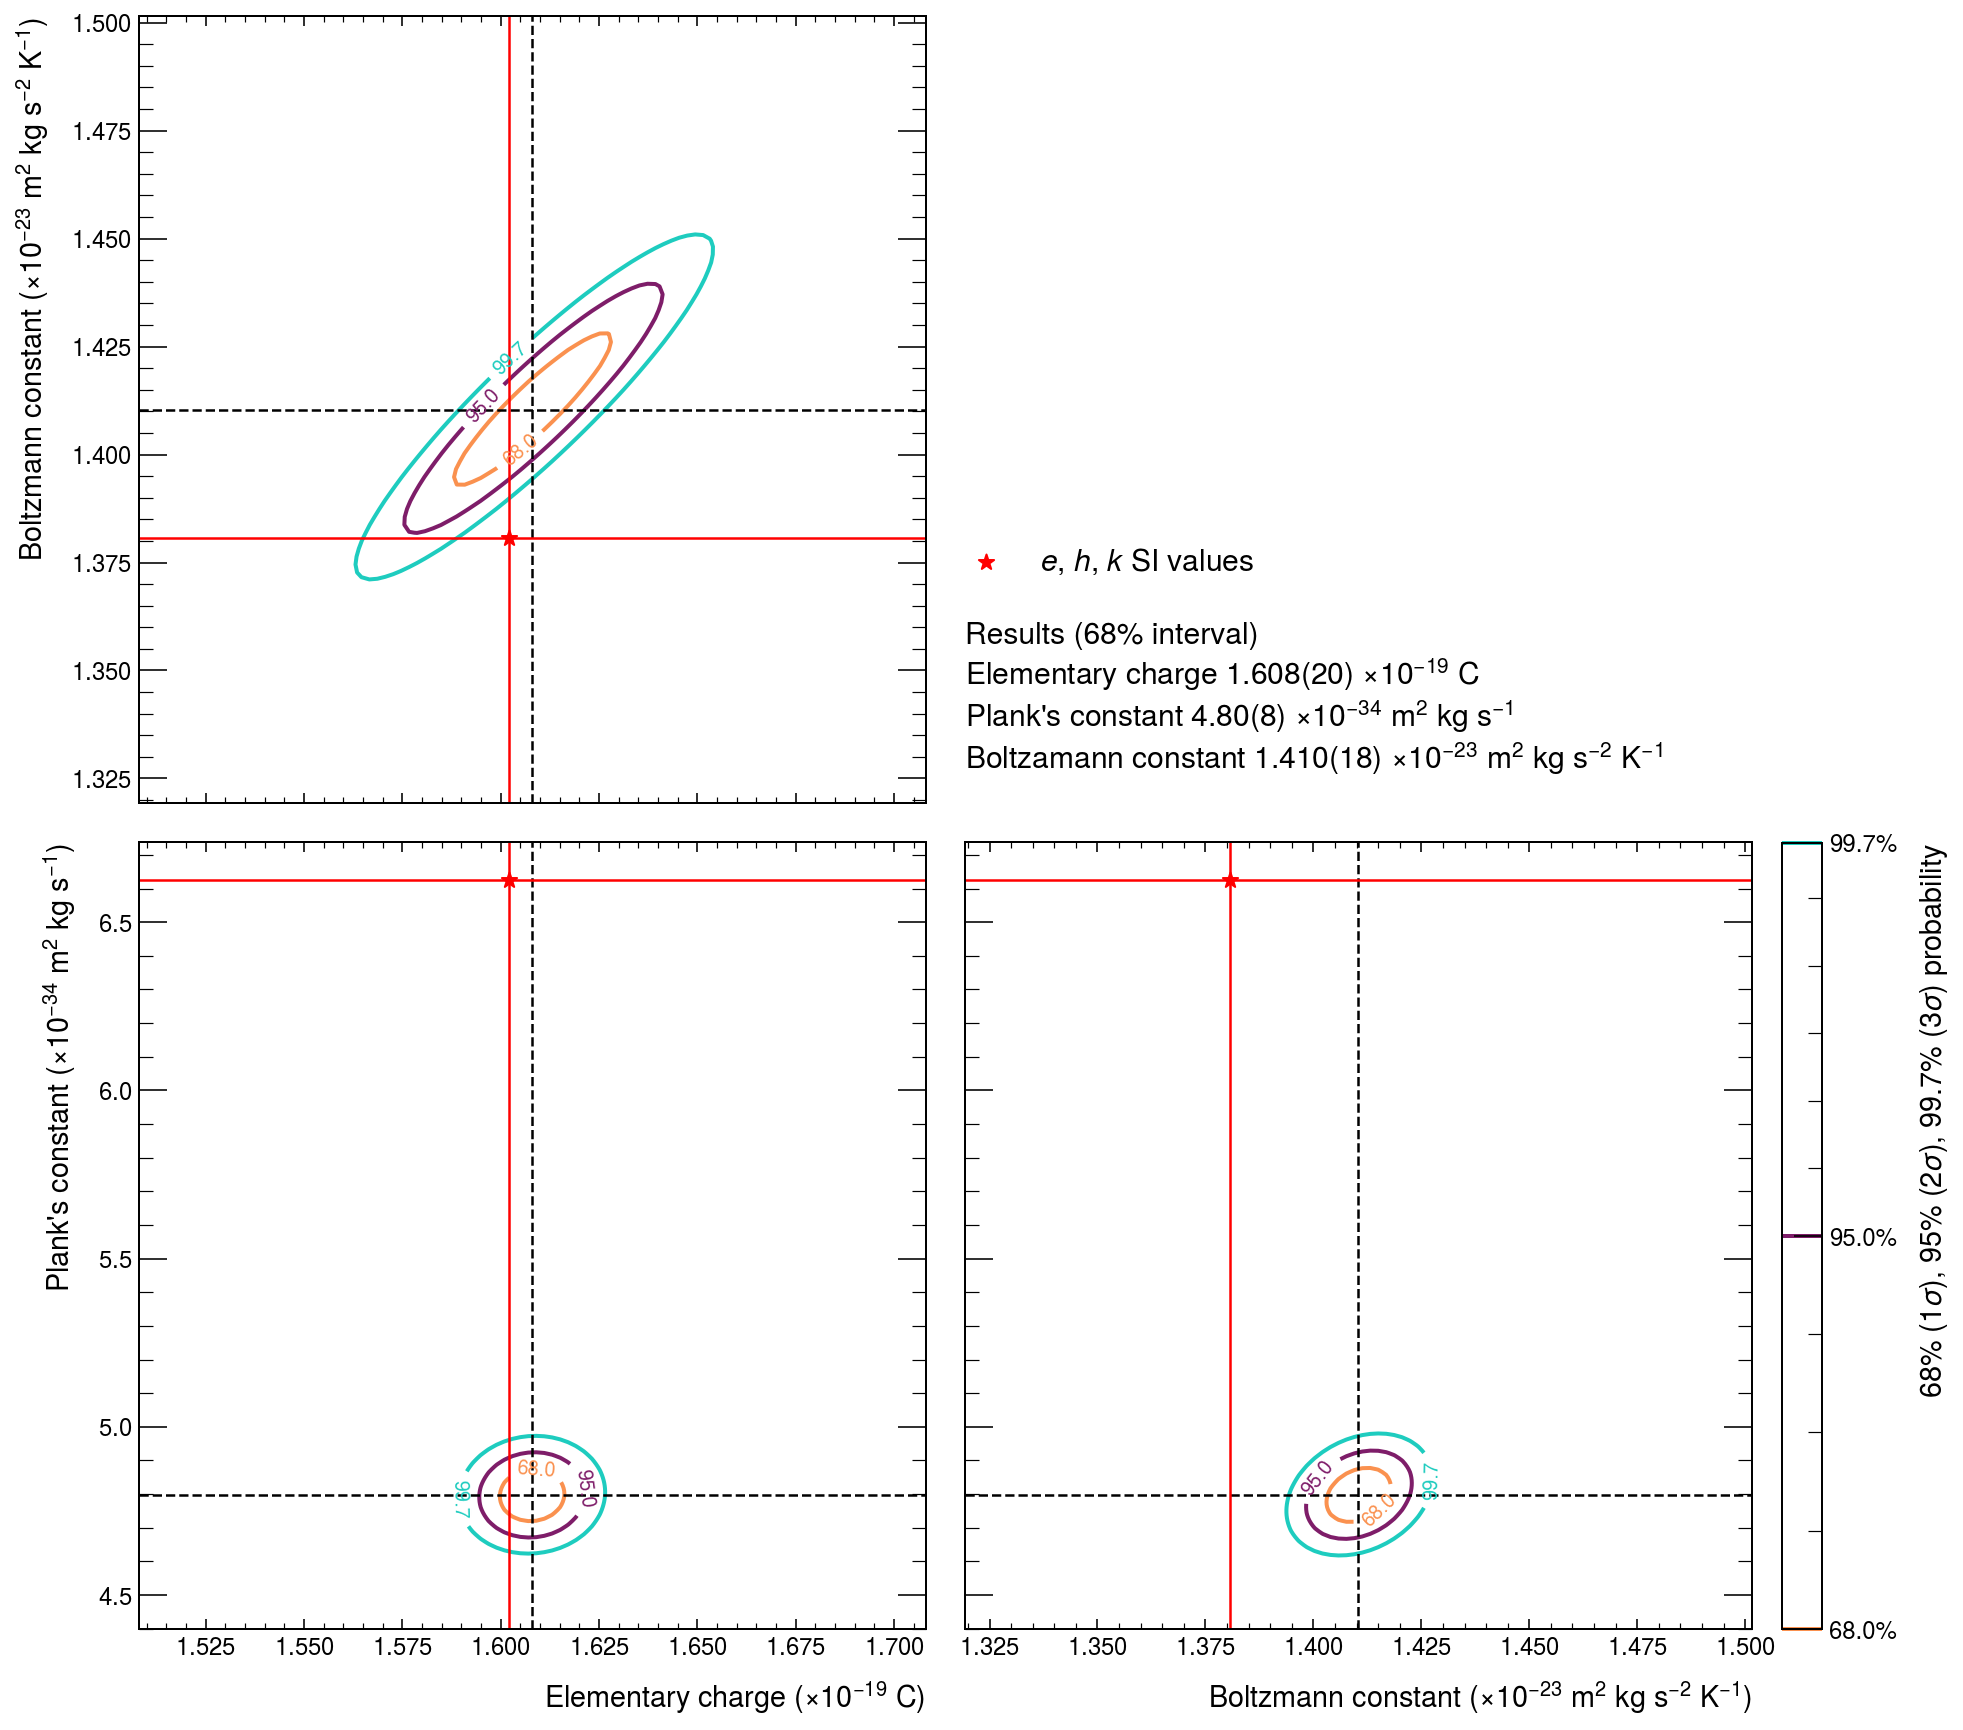

In [4]:
CL_eh = m_ehk.contour('e', 'h', size=100, bound=5, subtract_min=True)
CL_kh = m_ehk.contour('k', 'h', size=100, bound=5, subtract_min=True)
CL_ek = m_ehk.contour('e', 'k', size=100, bound=5, subtract_min=True)

fig = plt.figure(figsize=(14,14))
grid = fig.add_gridspec(2, 2, left=0.1, right=0.9, bottom=0.1, top=0.9,
                        wspace=0.05, hspace=0.05)

linestyle = '--'
linestyle2 = '-'
linewidth = 1.25
lw_contour = 6
color = 'k'
color2 = 'r'
cmap=cmr.guppy

def fmt(label):
    s: str = ''
    if label == 2.3:
        s += '68.0'
    if label == 6.17:
        s += '95.0'
    if label == 11.8:
        s += '99.7'
    return s
    

ax_eh = fig.add_subplot(grid[1,0])
CS_eh = ax_eh.contour(CL_eh[0], CL_eh[1], CL_eh[2].T, levels=[2.3, 6.17, 11.8], cmap=cmap)
ax_eh.set_ylabel(r"Plank's constant ($\times10^{-34}$ m$^2$ kg s$^{-1}$)")
ax_eh.set_xlabel(r'Elementary charge ($\times10^{-19}$ C)')
ax_eh.axhline(m_ehk.values['h'], ls=linestyle, color=color, linewidth=linewidth)
ax_eh.axvline(m_ehk.values['e'], ls=linestyle, color=color, linewidth=linewidth)
ax_eh.axhline(h, ls=linestyle2, color=color2, linewidth=linewidth)
ax_eh.axvline(e, ls=linestyle2, color=color2, linewidth=linewidth)
ax_eh.clabel(CS_eh, fmt=fmt)

ax_kh = fig.add_subplot(grid[1,1], sharey=ax_eh)
CS_kh = ax_kh.contour(CL_kh[0],CL_kh[1],CL_kh[2].T, levels=[2.3, 6.17, 11.8], cmap=cmap)
ax_kh.tick_params(labelleft=False)
ax_kh.set_xlabel(r'Boltzmann constant ($\times10^{-23}$ m$^2$ kg s$^{-2}$ K$^{-1}$)')
ax_kh.axhline(m_ehk.values['h'], ls=linestyle, color=color, linewidth=linewidth)
ax_kh.axvline(m_ehk.values['k'], ls=linestyle, color=color, linewidth=linewidth)
ax_kh.axhline(h, ls=linestyle2, color=color2, linewidth=linewidth)
ax_kh.axvline(k, ls=linestyle2, color=color2, linewidth=linewidth)
ax_kh.clabel(CS_kh, fmt=fmt)

ax_ek = fig.add_subplot(grid[0,0], sharex=ax_eh)
CS_ek = ax_ek.contour(CL_ek[0],CL_ek[1],CL_ek[2].T, levels=[2.3, 6.17, 11.8], cmap=cmap)
ax_ek.tick_params(labelbottom=False)
ax_ek.set_ylabel(r'Boltzmann constant ($\times10^{-23}$ m$^2$ kg s$^{-2}$ K$^{-1}$)')
ax_ek.axvline(m_ehk.values['e'], ls=linestyle, color=color, linewidth=linewidth)
ax_ek.axhline(m_ehk.values['k'], ls=linestyle, color=color, linewidth=linewidth)
ax_ek.axvline(e, ls=linestyle2, color=color2, linewidth=linewidth)
ax_ek.axhline(k, ls=linestyle2, color=color2, linewidth=linewidth)
ax_ek.clabel(CS_ek, fmt=fmt)

cax = fig.add_axes([0.915, 0.1, 0.02, 0.39])
CB = fig.colorbar(CS_kh, label=r'$68\%~(1\sigma)$, $95\%~(2\sigma)$, $99.7\%~(3\sigma)$ probability', cax=cax)
CB.ax.set_yticklabels(['68.0%', '95.0%', '99.7%'])
result_text = f'''Results (68% interval)
Elementary charge {ufloat(m_ehk.values['e'], m_ehk.errors['e']):uS} $\\times10^{{-19}}$ C
Plank's constant {ufloat(m_ehk.values['h'], m_ehk.errors['h']):uS} $\\times10^{{-34}}$ m$^2$ kg s$^{{-1}}$
Boltzamann constant {ufloat(m_ehk.values['k'], m_ehk.errors['k']):uS} $\\times10^{{-23}}$ m$^2$ kg s$^{{-2}}$ K$^{{-1}}$
'''

ax_ek.scatter(e, k, marker='*', color = 'r', label = '$e$, $h$, $k$ SI values')
ax_kh.scatter(k, h, marker='*', color = 'r')
ax_eh.scatter(e, h, marker='*', color = 'r')

ax_ek.text(
    1.05,
    0,
    result_text,
    transform=ax_ek.transAxes,
    size=15
)
ax_ek.legend(loc=(1.,0.25), fontsize=15)
fig.savefig('report/fig/ehk_contour_plot_68.pdf', bbox_inches='tight')